In [1]:
pip install qiskit_aer


Note: you may need to restart the kernel to use updated packages.


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

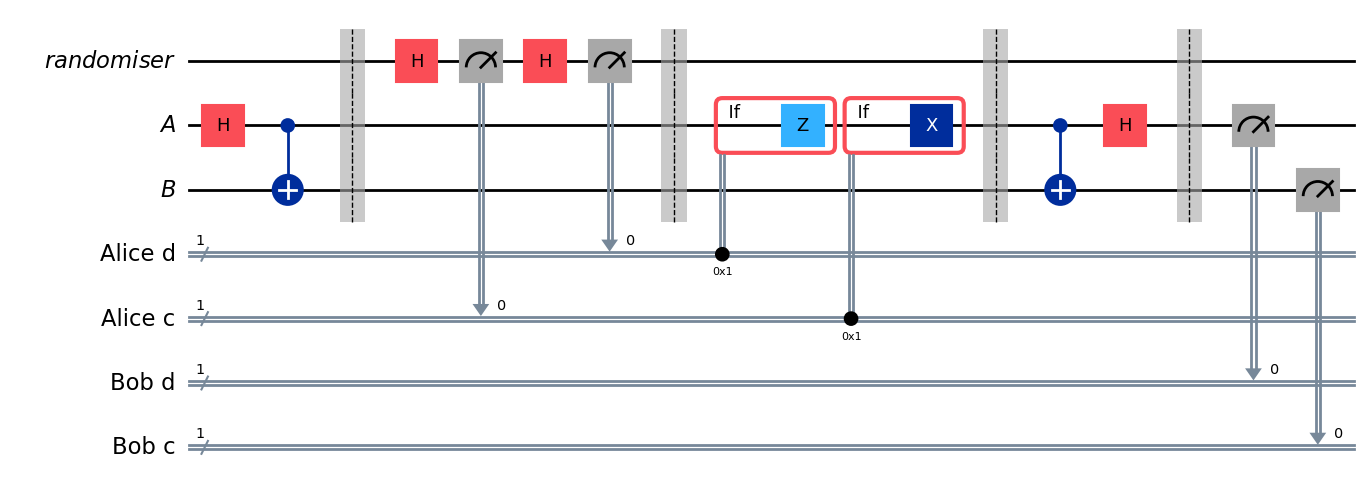

In [4]:
# construct circuit
# these are the two classical bits that Alice wants to send
A_c = ClassicalRegister(1, "Alice c")
A_d = ClassicalRegister(1, "Alice d")

ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

rand_qubit = QuantumRegister(1, "randomiser") # used to generate random classical bits

protocol = QuantumCircuit(rand_qubit, ebit0, ebit1, A_d, A_c )

# Now we must put the qubits into the first bell state

protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# generate random classical bits
protocol.h(rand_qubit)
protocol.measure(rand_qubit, A_c)
protocol.h(rand_qubit)
protocol.measure(rand_qubit, A_d)
protocol.barrier()

# Alice perfoms her operations on her qubit

with protocol.if_test((A_d,1), label="Z"):
    protocol.z(ebit0)
with protocol.if_test((A_c, 1), label="X"):
    protocol.x(ebit0)
protocol.barrier()

# Bob then performs a measurement in the bell basis

protocol.cx(ebit0, ebit1)
protocol.h(ebit0)
protocol.barrier()

B_c = ClassicalRegister(1, "Bob c")
B_d = ClassicalRegister(1, "Bob d")

protocol.add_register(B_d)
protocol.add_register(B_c)

protocol.measure(ebit0, B_d)
protocol.measure(ebit1, B_c)

display(protocol.draw(output='mpl'))

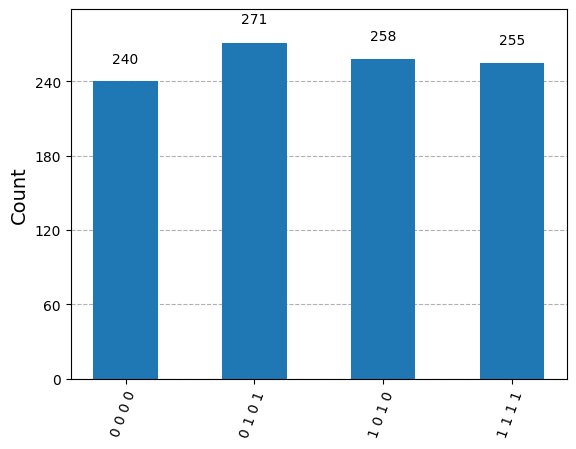

In [6]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))